In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

from pandas.tools import plotting
from scipy import stats
plt.style.use("ggplot")
import warnings
warnings.filterwarnings("ignore")
from subprocess import check_output

from sklearn.linear_model import LinearRegression

In [3]:
ColdWater = pd.read_csv('../user/waterdata.csv')

ColdWater.info()
ColdWater.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237196 entries, 0 to 237195
Data columns (total 7 columns):
time              237196 non-null object
AI_662_PV_CV      237196 non-null object
AI_663_PV_CV      237196 non-null object
AI_664_PV_CV      237196 non-null object
RPM_662_OUT_CV    237196 non-null object
RPM_663_OUT_CV    237196 non-null object
RPM_664_OUT_CV    237196 non-null object
dtypes: object(7)
memory usage: 12.7+ MB


,time,AI_662_PV_CV,AI_663_PV_CV,AI_664_PV_CV,RPM_662_OUT_CV,RPM_663_OUT_CV,RPM_664_OUT_CV
0,2018/4/1 0:00,83.0977935791,86.7187500000,83.0976409912,92.0808792114,92.0730667114,92.0730667114
1,2018/4/1 0:01,83.3785858154,87.7464447021,83.1444778442,92.0733032227,92.0537719727,92.0537719727
2,2018/4/1 0:02,83.3437881470,87.6376266479,82.6911468506,92.0657196045,92.0344772339,92.0344772339
3,2018/4/1 0:03,83.3086318970,87.4690551758,82.7508163452,92.0581359863,92.0151748657,92.0151748657
4,2018/4/1 0:04,83.7407684326,87.3747100830,82.7226867676,92.0505599976,91.9958801270,91.9958801270


In [4]:
# Delete Na 
Water662 = ColdWater.loc[:,('time','AI_662_PV_CV','RPM_662_OUT_CV')]
Water662 = Water662.convert_objects(convert_numeric=True)
Water662.dropna(inplace=True)
Water662.info()
print(Water662.head())
print('--------------------------------------------------')

# Delete value < 0
#Water662=Water662[Water662.AI_662_PV_CV>0]

#Water662.info()
#print(Water662.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 236571 entries, 0 to 237195
Data columns (total 3 columns):
time              236571 non-null object
AI_662_PV_CV      236571 non-null float64
RPM_662_OUT_CV    236571 non-null float64
dtypes: float64(2), object(1)
memory usage: 7.2+ MB
            time  AI_662_PV_CV  RPM_662_OUT_CV
0  2018/4/1 0:00     83.097794       92.080879
1  2018/4/1 0:01     83.378586       92.073303
2  2018/4/1 0:02     83.343788       92.065720
3  2018/4/1 0:03     83.308632       92.058136
4  2018/4/1 0:04     83.740768       92.050560
--------------------------------------------------


# Data Cleaning


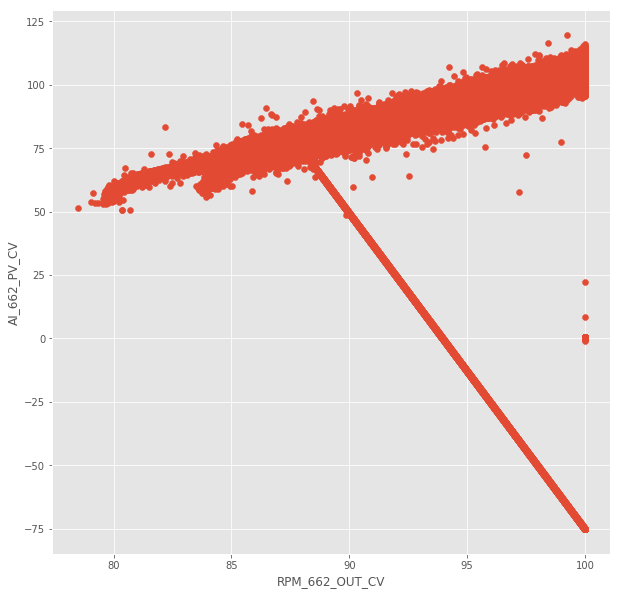

In [5]:
x = np.array(Water662.loc[:,'RPM_662_OUT_CV']).reshape(-1,1)
y = np.array(Water662.loc[:,'AI_662_PV_CV']).reshape(-1,1)
Water662.time = pd.to_datetime(Water662.time)


plt.figure(figsize=[10,10])
plt.scatter(x=x,y=y)
plt.xlabel('RPM_662_OUT_CV')
plt.ylabel('AI_662_PV_CV')
plt.show()

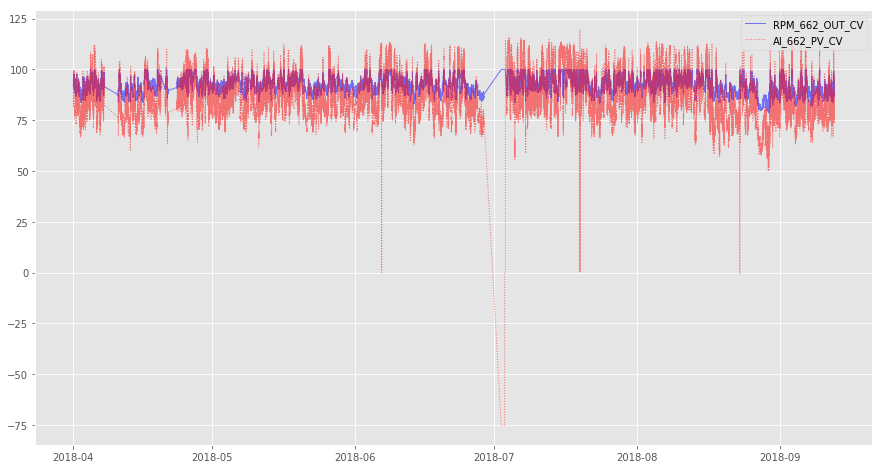

In [6]:
Water662.time = pd.to_datetime(Water662.time)

fig,ax = plt.subplots(figsize=(15,8)) #畫布大小
plt.plot(Water662.time, Water662.RPM_662_OUT_CV, color = 'b',label = 'RPM_662_OUT_CV',linewidth=1 ,alpha = 0.5,linestyle = '-')
plt.plot(Water662.time, Water662.AI_662_PV_CV, color = 'r',label = 'AI_662_PV_CV',linewidth=1 ,alpha = 0.5,linestyle = ':')
plt.legend(loc='upper right')

In [7]:
# Find outlier
desc=Water662.AI_662_PV_CV.describe()

Q1 = desc[4]
Q3 = desc[6]
IQR = Q3-Q1

Upper = Q3+1.5*IQR
Lower = Q1-1.5*IQR
print('Interval:(', Lower, ',', Upper, ')')
print('---------------------------------------')

# Final data 
Water662_F=Water662[(Water662.time>'2018-08-01 00:00:00') & (Water662.AI_662_PV_CV>40)]

Water662_F.info()

Interval:( 58.508680343625024 , 111.91515922542499 )
---------------------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 61281 entries, 175681 to 237195
Data columns (total 3 columns):
time              61281 non-null datetime64[ns]
AI_662_PV_CV      61281 non-null float64
RPM_662_OUT_CV    61281 non-null float64
dtypes: datetime64[ns](1), float64(2)
memory usage: 1.9 MB


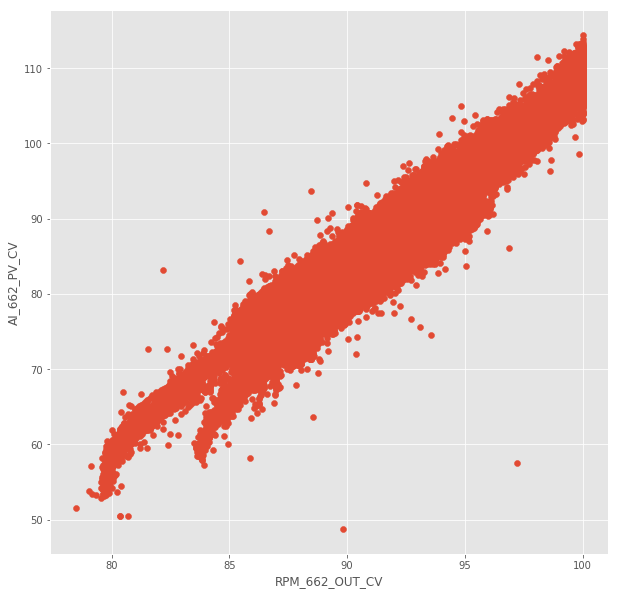

In [8]:
x2 = np.array(Water662_F.loc[:,'RPM_662_OUT_CV']).reshape(-1,1)
y2 = np.array(Water662_F.loc[:,'AI_662_PV_CV']).reshape(-1,1)

plt.figure(figsize=[10,10])
plt.scatter(x=x2,y=y2)
plt.xlabel('RPM_662_OUT_CV')
plt.ylabel('AI_662_PV_CV')
plt.show()

# Linear Regression

In [15]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

                            OLS Regression Results                            
Dep. Variable:                     y2   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                 8.540e+05
Date:                Wed, 19 Sep 2018   Prob (F-statistic):               0.00
Time:                        11:21:30   Log-Likelihood:            -1.5280e+05
No. Observations:               61281   AIC:                         3.056e+05
Df Residuals:                   61279   BIC:                         3.056e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -137.0829      0.240   -572.140      0.0

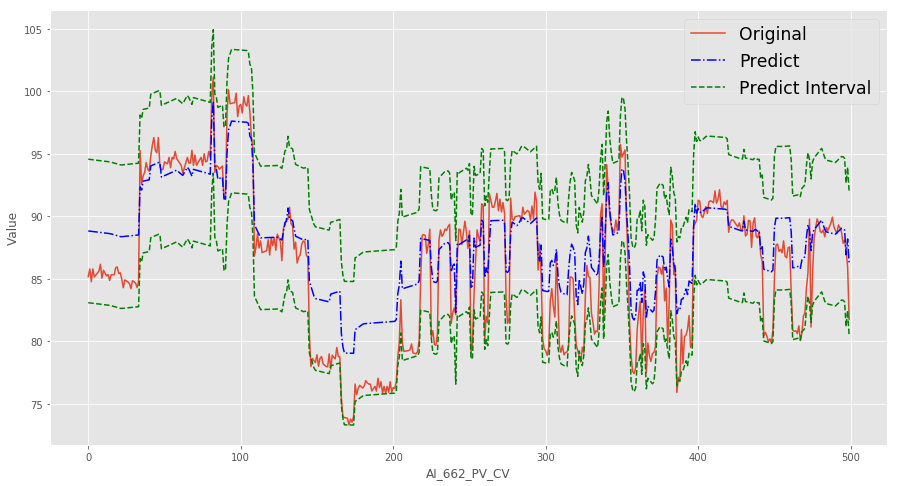

In [16]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from statsmodels.sandbox.regression.predstd import wls_prediction_std


x2 = np.array(Water662_F.loc[:,'RPM_662_OUT_CV']).reshape(-1,1)
y2 = np.array(Water662_F.loc[:,'AI_662_PV_CV']).reshape(-1,1)

results = smf.ols('y2 ~ x2',data = Water662_F).fit()
print(results.summary())
covb = results.cov_params()
print(covb)

prstd, iv_l, iv_u = wls_prediction_std(results)
pre = results.predict(exog=dict(x1=x2))

plt.figure(figsize=[15,8])
plt.plot(y2[0:500], label='Original')
plt.plot(pre[0:500], color='b', label='Predict', linestyle='-.')
plt.plot(np.array(iv_u)[0:500],color='g', label='Predict Interval', linestyle='--')
plt.plot(np.array(iv_l)[0:500],color='g', linestyle='--')
plt.ylabel('Value')
plt.xlabel('AI_662_PV_CV')
plt.legend(fontsize='xx-large')
plt.show()

                            OLS Regression Results                            
Dep. Variable:               y2_train   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                 5.936e+05
Date:                Wed, 19 Sep 2018   Prob (F-statistic):               0.00
Time:                        15:39:28   Log-Likelihood:            -1.0706e+05
No. Observations:               42896   AIC:                         2.141e+05
Df Residuals:                   42894   BIC:                         2.141e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -137.0358      0.287   -477.093      0.0

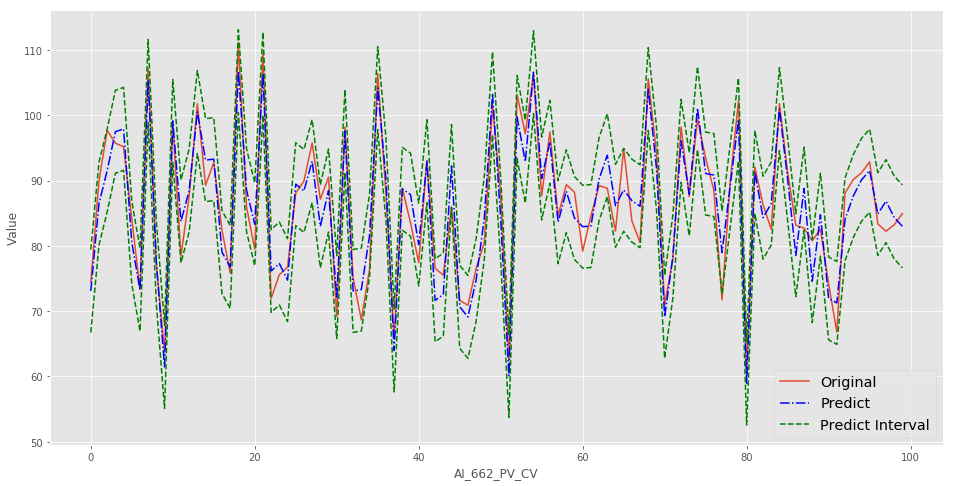

In [89]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from statsmodels.sandbox.regression.predstd import wls_prediction_std


x2 = Water662_F.loc[:,'RPM_662_OUT_CV']
y2 = Water662_F.loc[:,'AI_662_PV_CV']

x2_train,x2_test,y2_train,y2_test = train_test_split(x2,y2,random_state = 2, test_size = 0.3)
res = pd.concat([pd.DataFrame(x2_train), pd.DataFrame(y2_train)], axis=1)


results = smf.ols('y2_train ~ x2_train',data = res).fit()
print(results.summary())
print('--------------------')

pre = results.predict(exog=dict(x2_train=x2_test))

## Predict Interval
X = np.vstack((np.ones(x2_test.size), x2_test))
X = np.matrix( X )
C = np.linalg.inv( X * X.T ) #perform the matrix multiplication, and then take the inverse
C *= results.mse_resid # multiply by the MSE of the residual
SE = np.sqrt(C)
print('SE = \n', SE)
print('--------------------')

# the estimated coefficient, and its variance
beta, c = results.params[0], SE[0,0]
# critical value of the t-statistic
N = results.nobs
P = results.df_model
dof = N - P - 1
z = stats.t( dof ).ppf(0.975)
# the confidence interval of beta
print("CI of beta: \n", beta - z * c, beta + z * c)
print('--------------------')

# Interval
covb  = results.cov_params()
print("COV of Params:\n", covb)
prediction_var = results.mse_resid + (X * np.dot(covb, X).T).sum(1)
prediction_std = np.sqrt(prediction_var)
tppf = stats.t.ppf(0.975, results.df_resid)

interval_u = np.array(pre) + tppf * prediction_std[0]
interval_l = np.array(pre) - tppf * prediction_std[0]

# plot
plt.figure(figsize=[16,8])
plt.plot(np.array(y2_test)[0:100],label='Original')
plt.plot(np.array(pre)[0:100], color='b', label='Predict', linestyle='-.')

plt.plot(np.array(interval_u)[0,0:100],color='g', label='Predict Interval', linestyle='--')
plt.plot(np.array(interval_l)[0,0:100],color='g', linestyle='--')
plt.ylabel('Value')
plt.xlabel('AI_662_PV_CV')
plt.legend(fontsize='x-large')
plt.show()

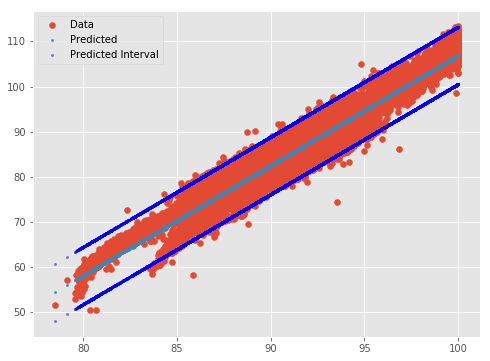

In [88]:
from statsmodels.sandbox.regression.predstd import wls_prediction_std
prstd, iv_l, iv_u = wls_prediction_std(results)

fig, ax = plt.subplots(figsize=(8,6))

#ax.axis(( 85, 88, 70, 75))
plt.scatter(x=np.array(x2_test), y=np.array(y2_test),  label="Data")
plt.scatter(np.array(x2_test), np.array(pre), label="Predicted",s=5)
plt.scatter(np.array(x2_test), np.array(interval_u),c='b', label="Predicted Interval",alpha=0.5,s=5)
plt.scatter(np.array(x2_test), np.array(interval_l),c='b',alpha=0.5,s=5)
legend = ax.legend(loc="best")

In [59]:
21/22

0.9545454545454546